<a href="https://colab.research.google.com/github/Muhammed-AhmedGithup/flowers-classification/blob/main/flowers_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
import PIL
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:TPU_SYSTEM:0', device_type='TPU_SYSTEM'),
 PhysicalDevice(name='/physical_device:TPU:0', device_type='TPU'),
 PhysicalDevice(name='/physical_device:TPU:1', device_type='TPU'),
 PhysicalDevice(name='/physical_device:TPU:2', device_type='TPU'),
 PhysicalDevice(name='/physical_device:TPU:3', device_type='TPU'),
 PhysicalDevice(name='/physical_device:TPU:4', device_type='TPU'),
 PhysicalDevice(name='/physical_device:TPU:5', device_type='TPU'),
 PhysicalDevice(name='/physical_device:TPU:6', device_type='TPU'),
 PhysicalDevice(name='/physical_device:TPU:7', device_type='TPU')]

In [ ]:
data_url='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir=keras.utils.get_file(fname='flower_photos',origin=data_url,cache_dir='.',untar=True)

228813984/228813984 [==============================] - 1s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
 len(list(data_dir.glob('*/*.jpg')))

3670

In [ ]:
roses=list(data_dir.glob('roses/*'))
roses[0:5]

[PosixPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5897035797_e67bf68124_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8590442797_07fa2141c0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2122401867_cd86c5f114_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6158504080_b844a9ae05.jpg')]

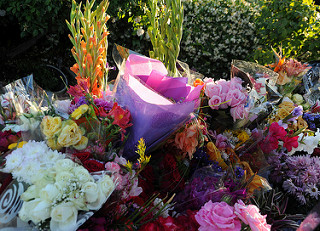

In [ ]:
PIL.Image.open(str(roses[0]))

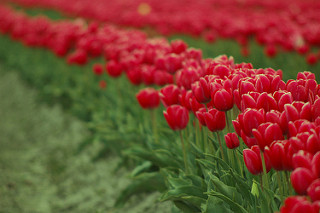

In [ ]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

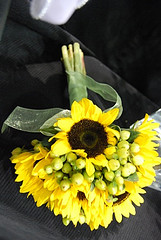

In [ ]:
sunflowers=list(data_dir.glob('sunflowers/*'))
PIL.Image.open(str(sunflowers[0]))

In [ ]:
Flowers_Image_Dic={
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'roses':list(data_dir.glob('roses/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*'))

}

In [ ]:
Flowrer_labels_Dic={
    'daisy':0,
    'dandelion':1,
    'roses':2,
    'sunflowers':3,
    'tulips':4
}

In [ ]:
Flowers_Image_Dic['roses'][0]

PosixPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg')

In [ ]:
img=cv2.imread(str(Flowers_Image_Dic['roses'][0]))
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
x,y=[],[]
for flower_name,images in Flowers_Image_Dic.items():
    for image in images:
        img=cv2.imread(str(image))
        resized=cv2.resize(img,(180,180))
        x.append(resized)
        y.append(Flowrer_labels_Dic[flower_name])

In [ ]:
y[0:5]

[0, 0, 0, 0, 0]

In [ ]:
type(x)

list

In [ ]:
x=np.array(x)
y=np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.33, random_state=0)

In [ ]:
x_train_scale=x_train/255
x_test_scale=x_test/255

In [ ]:
x_train_scale.shape

(2458, 180, 180, 3)

In [ ]:
y_train[0:10]

array([3, 0, 1, 1, 4, 1, 1, 0, 1, 2])

In [ ]:
data_augmentation=Sequential([
    keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
])

In [ ]:
model=Sequential([
    data_augmentation,
    keras.layers.Conv2D(filters=16,padding='same',kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(filters=32,padding='same',kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    #Dense
    keras.layers.Flatten(),
    Dense(128,activation='relu'),
    Dense(5,activation='softmax')
])
model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [ ]:
model.fit(x_train_scale,y_train,epochs=10)

Epoch 1/10
77/77 [==============================] - 63s 818ms/step - loss: 0.1624 - accuracy: 0.9439
Epoch 2/10
40/77 [==============>...............] - ETA: 30s - loss: 0.1160 - accuracy: 0.9594

In [ ]:
model.evaluate(x_test_scale,y_test)

38/38 [==============================] - 6s 157ms/step - loss: 1.3044 - accuracy: 0.7252


[1.3043692111968994, 0.7252475023269653]

In [ ]:
yhat=model.predict(x_test_scale)

38/38 [==============================] - 6s 151ms/step


In [ ]:
classes=[np.argmax(i) for i in yhat]
classes[0:5]

[1, 0, 2, 4, 4]

In [ ]:
y_test[0:5]

array([1, 0, 2, 4, 2])

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=classes)

<Axes: >

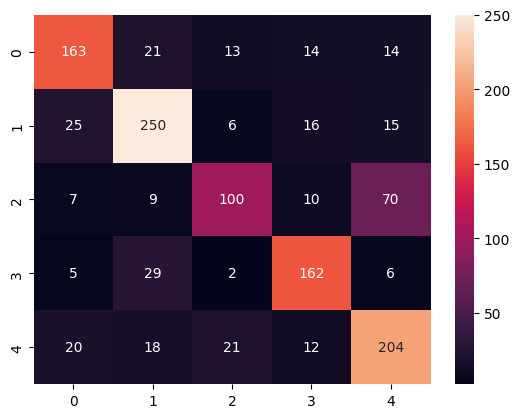

In [ ]:
sns.heatmap(cm,annot=True,fmt='d')